In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline   # we want the plot to be appear as in line with the code 

UsageError: unrecognized arguments: # we want the plot to be appear as in line with the code


In [16]:
products=pd.read_csv("products.csv")

In [17]:
products.shape

(49688, 4)

In [18]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
orders=pd.read_csv("orders.csv")

In [7]:
orders.shape

(3421083, 7)

In [20]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
#orders.drop(['eval_set','days_since_prior_order'],axis=1,inplace= False )

In [22]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
opp=pd.read_csv("order_products__prior.csv")

In [24]:
opp.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
selected_orders = set(opp.order_id.sample(100000).tolist())

In [26]:
sampled_opp = opp[opp.order_id.isin(selected_orders)].reset_index(drop=True)

In [27]:
opt=pd.read_csv("order_products__train.csv")
department=pd.read_csv("departments.csv")
ailes=pd.read_csv("aisles.csv")

In [28]:
opp_product = sampled_opp.merge(products, on='product_id')
opp_prod_dept = opp_product.merge(department, on='department_id')
opp_prod_dept_aisle = opp_prod_dept.merge(ailes, on='aisle_id')
fdata = opp_prod_dept_aisle.merge(orders, on='order_id')

In [29]:
fdata.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,13,17330,1,0,Light,27,5,alcohol,beers coolers,45082,prior,2,6,17,1.0
1,13,35419,3,0,"Handmade Vodka From Austin, Texas",124,5,alcohol,spirits,45082,prior,2,6,17,1.0
2,13,27407,2,0,Chunky Salsa Medium,51,13,pantry,preserved dips spreads,45082,prior,2,6,17,1.0
3,13,44635,5,0,Salsa Con Queso Medium Dip,51,13,pantry,preserved dips spreads,45082,prior,2,6,17,1.0
4,13,196,4,0,Soda,77,7,beverages,soft drinks,45082,prior,2,6,17,1.0


In [30]:
fdata.shape

(1522612, 15)

In [37]:
fdata=fdata[['user_id','order_hour_of_day','order_dow','order_number','order_id','product_id','product_name','reordered','days_since_prior_order','department_id','department','aisle']]

In [38]:
fdata.head()

,user_id,order_hour_of_day,order_dow,order_number,order_id,product_id,product_name,reordered,days_since_prior_order,department_id,department,aisle
0,45082,17,6,2,13,17330,Light,0,1.0,5,alcohol,beers coolers
1,45082,17,6,2,13,35419,"Handmade Vodka From Austin, Texas",0,1.0,5,alcohol,spirits
2,45082,17,6,2,13,27407,Chunky Salsa Medium,0,1.0,13,pantry,preserved dips spreads
3,45082,17,6,2,13,44635,Salsa Con Queso Medium Dip,0,1.0,13,pantry,preserved dips spreads
4,45082,17,6,2,13,196,Soda,0,1.0,7,beverages,soft drinks


In [39]:
fdata.shape

(1522612, 12)

In [40]:
fdata['department'].value_counts().head(3)

produce       440385
dairy eggs    251811
snacks        140271
Name: department, dtype: int64

In [41]:
#top 5 orders --->
fdata.product_name.value_counts(ascending=False).reset_index().head(10)

,index,product_name
0,Banana,19741
1,Bag of Organic Bananas,15707
2,Organic Strawberries,11890
3,Organic Baby Spinach,10686
4,Organic Hass Avocado,10126
5,Organic Avocado,7878
6,Large Lemon,7374
7,Limes,6943
8,Organic Raspberries,6606
9,Strawberries,6033


In [42]:
fdata.product_name.value_counts(ascending=False).reset_index().tail(5)

,index,product_name
38044,Gluten Free Seeds & Grains Bread,1
38045,100 Calorie Right Bites Crackers,1
38046,Spicy Spinach Blend,1
38047,Snacks Apple,1
38048,Brownie Crunch High Protein Bars,1


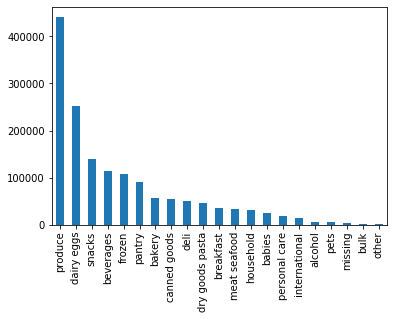

In [43]:
fdata['department'].value_counts().plot(kind='bar')

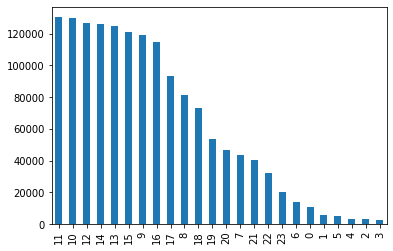

In [44]:
fdata['order_hour_of_day'].value_counts().plot(kind='bar')

In [45]:
# users oders are the highest from 9 am untill 6 pm. By 10 amd and 11 am  order the most and after 6 pm it slows down. 

In [46]:
fdata['order_hour_of_day'].value_counts().head(24)

11    130559
10    129654
12    126488
14    126012
13    124608
15    121394
9     119481
16    114529
17     93590
8      81598
18     72898
19     53844
20     46453
7      43611
21     40366
22     32488
23     20509
6      14146
0      10644
1       5811
5       5064
4       3255
2       3040
3       2570
Name: order_hour_of_day, dtype: int64

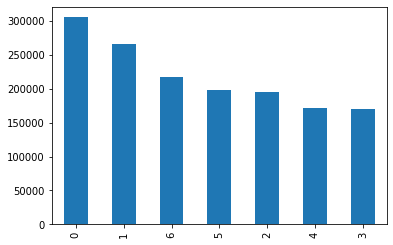

In [47]:

fdata['order_dow'].value_counts().plot(kind='bar')

In [48]:
# sunday,saturday , monday has the most orders
#wednesday , thursday 


In [49]:
fdata.nunique()

user_id                   62765
order_hour_of_day            24
order_dow                     7
order_number                 99
order_id                  97799
product_id                38049
product_name              38049
reordered                     2
days_since_prior_order       31
department_id                21
department                   21
aisle                       134
dtype: int64

In [50]:
users=fdata.user_id.unique()

In [51]:
user_count=len(users)

In [52]:
user_count

62765

In [53]:
orders_amount_of_users = fdata.groupby('user_id')['order_number'].count().value_counts()

Text(0.5, 0, 'Amount of Orders')

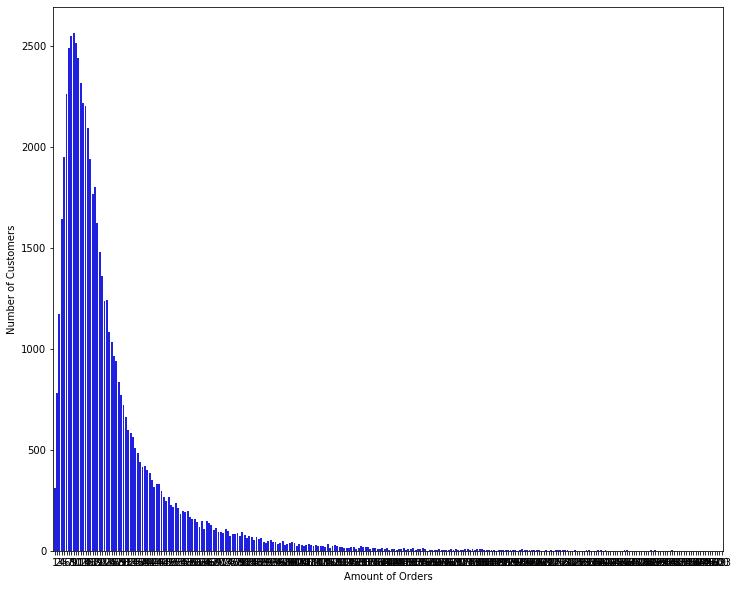

In [54]:
#Distirbution of orders among users 
plt.figure(figsize=(12,10))
sns.barplot(x= orders_amount_of_users.index, y=orders_amount_of_users.values,color='blue')
plt.ylabel('Number of Customers')
plt.xlabel('Amount of Orders')


In [55]:
#average, customers order about 4-5 times . 

In [56]:
fdata.shape

(1522612, 12)

In [57]:
fdata.groupby('user_id').order_number.value_counts().sort_values(ascending=False).head(10)


user_id  order_number
25070    13              109
60694    2               108
72377    7               104
129928   30              104
         55              101
163724   7                99
60694    6                96
         62               96
201268   9                94
166743   32               92
Name: order_number, dtype: int64

In [58]:
fdata.user_id.nunique()

62765

In [59]:
hmap1 = fdata.groupby(["order_hour_of_day","order_dow"])["order_number"].aggregate("count").reset_index()

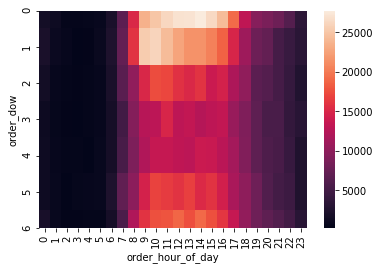

In [60]:
hmap1 = hmap1.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(hmap1)


In [61]:
#most oreders are saturday morning and sunday morning 

In [62]:
len(fdata['aisle'].unique())

134

In [63]:
fdata['aisle'].value_counts()[0:10]

fresh vegetables                 167363
fresh fruits                     164027
packaged vegetables fruits        82661
yogurt                            71798
packaged cheese                   48732
milk                              37376
chips pretzels                    35193
water seltzer sparkling water     33343
soy lactosefree                   28245
bread                             26918
Name: aisle, dtype: int64

In [64]:
number_of_items_per_order=fdata.groupby('order_id')['product_id'].count().value_counts().sort_values(ascending=False).head(10)

In [65]:
number_of_items_per_order

9     5129
8     5058
10    5047
11    4843
12    4818
7     4721
13    4529
14    4454
15    4233
6     4126
Name: product_id, dtype: int64

In [66]:
#Majority of order consisted of 9-10 orders. 

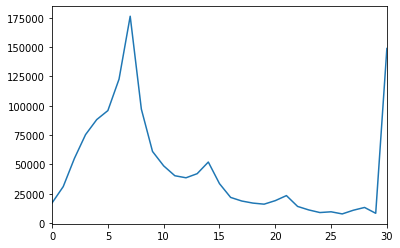

In [67]:
fdata.days_since_prior_order.value_counts().sort_index().plot()

In [68]:
#most orders are being ordered the most after 6-7 days. it appears to peak by 14 days and 21-22 days which indicates users habbit of ordering weekly,biweekly,triweekly. 

In [69]:
time_dep = pd.crosstab(fdata['order_hour_of_day'] ,fdata['department'])
time_dep.head(10)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,17,119,340,865,224,7,378,1641,328,287,...,229,75,214,21,7,705,147,57,3149,944
1,11,64,188,465,128,7,183,956,176,161,...,106,54,92,11,5,368,106,43,1671,548
2,11,44,105,235,61,1,116,456,84,89,...,80,26,72,13,2,219,43,8,880,240
3,11,36,89,219,54,3,94,393,73,85,...,51,26,60,7,3,141,49,25,702,233
4,8,48,113,258,69,1,147,489,124,100,...,79,39,79,4,4,178,41,24,879,249
5,7,73,157,365,111,2,195,803,170,134,...,147,40,112,16,12,273,73,15,1552,408
6,25,257,501,935,372,18,475,2500,439,401,...,317,130,312,33,15,829,162,28,4214,1200
7,45,1000,1712,3001,1081,41,1392,7561,1437,1297,...,900,337,960,117,46,2354,552,117,13040,3704
8,159,1518,3093,5936,2115,79,2744,14339,2589,2254,...,1797,652,1772,168,90,4530,926,203,23870,7491


In [70]:
fdata['department'].value_counts().head(7)

produce       440385
dairy eggs    251811
snacks        140271
beverages     113859
frozen        107880
pantry         89667
bakery         55596
Name: department, dtype: int64

In [71]:
fdata['department'].value_counts().tail(7)

personal care    18998
international    13423
alcohol           4707
pets              4609
missing           3438
bulk              1622
other             1550
Name: department, dtype: int64

In [72]:
time_dep.shape

(24, 21)

In [73]:
#for col in time_dep:
    #print(col)
    #print(time_dep[col].unique())

In [74]:
from datetime import timedelta

In [75]:
#time_dep['produce'] = time_dep.produce.apply(lambda x: int(x))

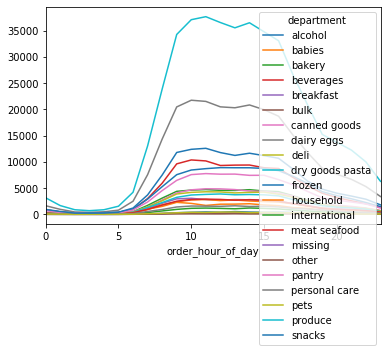

In [80]:
time_dep.sort_index().plot()

In [77]:
time_dep.sort_values(by='produce', ascending=True, inplace=True)

In [78]:
time_dep.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
3,11,36,89,219,54,3,94,393,73,85,...,51,26,60,7,3,141,49,25,702,233
4,8,48,113,258,69,1,147,489,124,100,...,79,39,79,4,4,178,41,24,879,249
2,11,44,105,235,61,1,116,456,84,89,...,80,26,72,13,2,219,43,8,880,240
5,7,73,157,365,111,2,195,803,170,134,...,147,40,112,16,12,273,73,15,1552,408
1,11,64,188,465,128,7,183,956,176,161,...,106,54,92,11,5,368,106,43,1671,548


In [79]:
#number_of_items_per_order, order_hour_of_day

## Order size analysis

In [83]:
fdata.head()

,user_id,order_hour_of_day,order_dow,order_number,order_id,product_id,product_name,reordered,days_since_prior_order,department_id,department,aisle
0,45082,17,6,2,13,17330,Light,0,1.0,5,alcohol,beers coolers
1,45082,17,6,2,13,35419,"Handmade Vodka From Austin, Texas",0,1.0,5,alcohol,spirits
2,45082,17,6,2,13,27407,Chunky Salsa Medium,0,1.0,13,pantry,preserved dips spreads
3,45082,17,6,2,13,44635,Salsa Con Queso Medium Dip,0,1.0,13,pantry,preserved dips spreads
4,45082,17,6,2,13,196,Soda,0,1.0,7,beverages,soft drinks


In [121]:
# temp_df contains the data that we will use in modeling.
temp_df = fdata.groupby(['order_hour_of_day', 'order_dow', 'order_id']).order_number.count().reset_index()

In [122]:
# we want to know whether user_id can be added to the X dataframe to improve prediction. However, the user_id can only
# be added if the user has ordered more than once in the dataset. The following lines count the number of users who
# have ordered N times. For example, the first row is the number of poeple who have ordered once, the second row is
# the number of people who have ordered 2 times, etc.
order_user_df = fdata.groupby(['order_id','user_id']).order_number.count().reset_index()
order_user_df.drop(
    'order_id', axis=1).user_id.value_counts().value_counts()

1     41986
2     12599
3      4761
4      1930
5       835
6       363
7       170
8        61
9        36
10       13
11        7
13        2
12        2
Name: user_id, dtype: int64

In [118]:
# we see that 41,986 users have only ordered once, and can't be used in a model that includes user_id as a feature.
# However, we're going to stll create the feature, and drop those user_ids from it when using a model that contains
# user_id as a feature.

In [126]:
# we are going to merge the order_user_df with temp_df, and then we will drop those order_id rows where the
# corresponding user_id only has one order
temp_df_with_userid = temp_df.merge(order_user_df[['order_id', 'user_id']], on='order_id')

In [144]:
user_order_count = temp_df_with_userid.user_id.value_counts()
users_ordering_once = set(user_order_count[user_order_count == 1].index)
temp_df_with_userid = temp_df_with_userid[~temp_df_with_userid.user_id.isin(users_ordering_once)].reset_index(drop=True)

In [145]:
temp_df_with_userid

,order_hour_of_day,order_dow,order_id,order_number,user_id
0,0,0,71735,18,72220
1,0,0,152561,24,132305
2,0,0,183636,17,107393
3,0,0,210244,6,138485
4,0,0,214833,12,80853
...,...,...,...,...,...
55808,23,6,3364129,38,61895
55809,23,6,3407955,24,129282
55810,23,6,3416251,39,37592
55811,23,6,3418243,20,196596


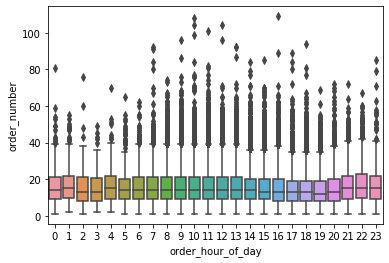

In [100]:
# there doesn't seem to be a linear relationship between order_hour_of_day and order_size. So, we will use a
# non-linear model.
sns.boxplot(x='order_hour_of_day', y='order_number', data=temp_df)

In [218]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

#lr = LinearRegression()
model = DecisionTreeRegressor()

In [223]:
feature_cols=['order_hour_of_day', 'order_dow', 'user_id']
X=temp_df_with_userid[feature_cols]
y=temp_df_with_userid['order_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



model.fit(X_train,y_train)

y_pred=model.predict(X_test)
model.score(X, y)





0.6211029788403895

In [213]:

#def train_test(x,y):
#X = temp_df_with_userid['order_hour_of_day', 'order_dow', 'user_id']
#y = temp_df_with_userid['order_number']
    
    
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    

#model.fit(X, y)
#model.score(X, y)

In [224]:
#X = temp_df_with_userid[['order_hour_of_day', 'order_dow', 'user_id']]
#y = temp_df_with_userid['order_number']
#model.fit(X, y)
#model.score(X, y)